## 第二回課題
```
1. K = 1 で, T = 1, 3, 5 [s] の 3 通りの一次システムの時間応答を Python で重ねてプロットせよ。
 - 横軸の範囲は0sから20sで100点
 - グリッド線あり，凡例あり ("T=1", "T=3", "T=5")，軸ラベルあり ("t [s]", "y")
 - T = 1:青実線，T = 3:緑破線，T = 5:赤一点鎖線

2. プロットしたグラフをもとに一次システムにおける時定数 T の意味を簡単に述べよ(もちろん厳密 に述べてもよい)。
3. 電気回路の RC 直列回路は時定数 RC の一次システムであることが知られている。収束を早めるた めには抵抗 R や静電容量 C をどうすればよいだろうか。
```

### 1. K = 1 で, T = 1, 3, 5 [s] の 3 通りの一次システムの時間応答を Python で重ねてプロットせよ。

In [11]:
# 各種ライブラリインポート
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

一次システムの伝達関数は

$$
    P(s) = \frac{K}{Ts + 1}
$$

で表されるから，三通りのシステムをそれぞれ$P_1(s)$，$P_2(s)$，$P_3(s)$とすると，
$$ 
    P_1(s) = \frac{1}{1s + 1}\\
    P_2(s) = \frac{1}{3s + 1}\\
    P_3(s) = \frac{1}{5s + 1}
$$
である

In [12]:
#横軸の定義
t = np.linspace(0,20,100)

In [13]:
#各システムの伝達関数を定義
P1 = tf([1], [1, 1])
P2 = tf([1], [3, 1])
P3 = tf([1], [5, 1])

In [14]:
#各システムのステップ応答を計算
y1, t = step(P1, t)
y2, t = step(P2, t)
y3, t = step(P3, t)


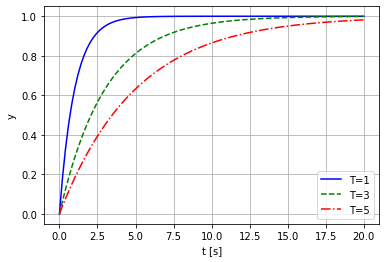

In [15]:
#グラフの出力
plt.plot(t, y1, label='T=1', color="blue")
plt.plot(t, y2, label='T=3', color="green", linestyle="--")
plt.plot(t, y3, label='T=5', color="red", linestyle="-.")
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("y")
plt.grid()
plt.show()

求める時間応答の内容として，sin波を入力しグラフ化してみる．

/Users/washio/opt/anaconda3/envs/pyctrl/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


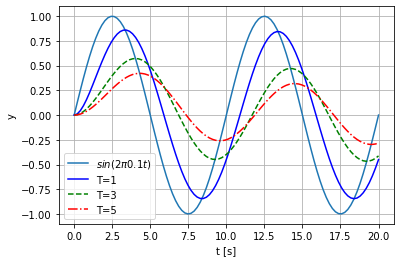

In [16]:
freq = 0.1
amp = 1.0
u = amp*np.sin(2*np.pi*freq*t)
(y1sin, T1sin, x1sin )= lsim(P1, U=u, T=t)
(y2sin, T2sin, x2sin) = lsim(P2, U=u, T=t)
(y3sin, T3sin, x3sin) = lsim(P3, U=u, T=t)

plt.plot(T1sin, u, label="$sin(2\pi 0.1t)$")
plt.plot(T1sin, y1sin, label='T=1', color="blue")
plt.plot(T1sin, y2sin, label='T=3', color="green", linestyle="--")
plt.plot(T1sin, y3sin, label='T=5', color="red", linestyle="-.")
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("y")
plt.grid()
plt.show()

/Users/washio/opt/anaconda3/envs/pyctrl/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


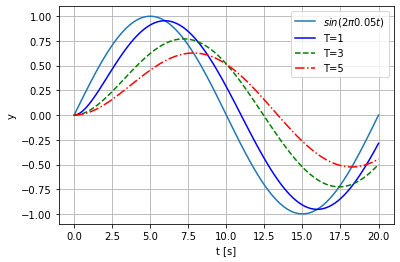

In [17]:
freq = 0.05
amp = 1.0
u = amp*np.sin(2*np.pi*freq*t)
(y1sin, T1sin, x1sin) = lsim(P1, U=u, T=t)
(y2sin, T2sin, x2sin) = lsim(P2, U=u, T=t)
(y3sin, T3sin, x3sin) = lsim(P3, U=u, T=t)

plt.plot(T1sin, u, label="$sin(2\pi 0.05t)$")
plt.plot(T1sin, y1sin, label='T=1', color="blue")
plt.plot(T1sin, y2sin, label='T=3', color="green", linestyle="--")
plt.plot(T1sin, y3sin, label='T=5', color="red", linestyle="-.")
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("y")
plt.grid()
plt.show()


### 2. プロットしたグラフをもとに一次システムにおける時定数 T の意味を簡単に述べよ(もちろん厳密 に述べてもよい)。

グラフから$P_1(s)$，$P_2(s)$，$P_3(s)$の定常状態までの収束時間はそれぞれ，およそ5.0[s]，15.0[s]，20.0[s]であると読み取れる．
ここから，一次システムにおける時定数Tはステップ入力等の外部入力に対する，システムの過度応答の速度と収束時間を表すといえる．

また，入力したsin波とその応答から，Tが大きなシステムの応答ほど入力した関数より遅れた応答となり，応答の振幅が小さくなったことから，
収束時間に加えて，応答の大きさも決定づけると考えられる．

### 3. 電気回路の RC 直列回路は時定数 RC の一次システムであることが知られている。収束を早めるためには抵抗 R や静電容量 C をどうすればよいだろうか。

課題1の内容から，時定数が小さいシステムほど入力に対する応答の収束速度が早いと考えられる．

したがって，時定数RCで表される一次システムでは．RとCの積，すなわち抵抗値と静電容量の積が小さくなるよう設定すれば収束時間は早くなると推測される．


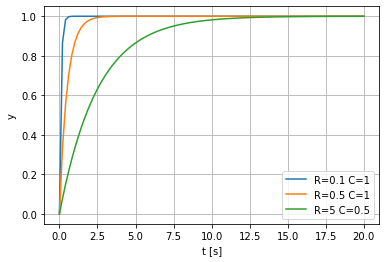

In [18]:
R = 0.1
C = 1
P4 = tf([1], [R*C, 1])
R = 0.5
C = 1
P5 = tf([1], [R*C, 1])
R = 5
C = 0.5
P6 = tf([1], [R*C, 1])

y4, t = step(P4, t)
y5, t = step(P5, t)
y6, t = step(P6, t)


#グラフの出力
plt.plot(t, y4, label='R=0.1 C=1')
plt.plot(t, y5, label='R=0.5 C=1')
plt.plot(t, y6, label='R=5 C=0.5')
plt.legend()
plt.xlabel("t [s]")
plt.ylabel("y")
plt.grid()
plt.show()

実際に適当なRとCの定数を定めステップ応答を確認すると，推測に従った結果が得られた．